# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [26]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
cities2 = ['dharan', 'ornskoldsvik', 'bucksport', 'lasa', 'barabai', 'vikhorevka', 'saint-gilles', 'barra do garcas', 'cermik', 'igbo ora', 'taolanaro',
 'illoqqortoormiut',
 'alotau',
 'albany',
 'sentyabrskiy',
 'hamilton',
 'port alfred',
 'port hardy',
 'hithadhoo',
 'barrow',
 'butaritari',
 'faanui',
 'hermanus',
 'puerto ayora',
 'jamestown',
 'nefteyugansk',]

weather_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build query url. Test first by appending one city name to the end of f-string. Test get and json-ify.
query_url = f"{weather_url}appid={weather_api_key}&units={units}&q="

In [123]:
# Loop through each city in cities list (randomly put in list by starter code) and append to open lists. 
# Loop generates respons and json_ifies each response

name = []
city_id = []
lat = []
lon = []
temperature = []
humidity = []
cloudiness = []
windspeed = []
date = []

counter = 1

for city in cities2:
    response = requests.get(query_url + city).json()
    
    try:
        name.append(response["name"])
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        temperature.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        windspeed.append(response["wind"]["speed"])
        date.append(response["dt"])
        print(f"{city}: city number {counter} of {len(cities2)} has been located.")
        counter += 1

    except (KeyError, IndexError):
        print(f"Missing data for city number {counter} of {len(cities2)}.")
        counter += 1
    
    time.sleep(1)     

dharan: city number 1 of 26 has been located.
ornskoldsvik: city number 2 of 26 has been located.
bucksport: city number 3 of 26 has been located.
lasa: city number 4 of 26 has been located.
barabai: city number 5 of 26 has been located.
vikhorevka: city number 6 of 26 has been located.
saint-gilles: city number 7 of 26 has been located.
barra do garcas: city number 8 of 26 has been located.
cermik: city number 9 of 26 has been located.
igbo ora: city number 10 of 26 has been located.
Missing data for city number 11 of 26.
Missing data for city number 12 of 26.
Missing data for city number 13 of 26.
albany: city number 14 of 26 has been located.
Missing data for city number 15 of 26.
hamilton: city number 16 of 26 has been located.
port alfred: city number 17 of 26 has been located.
port hardy: city number 18 of 26 has been located.
hithadhoo: city number 19 of 26 has been located.
barrow: city number 20 of 26 has been located.
butaritari: city number 21 of 26 has been located.
faanui:

In [29]:
# Convert Raw Data to DataFrame
city_data_df = pd.DataFrame({"City":name, "Latitude":lat, "Longitude":lon, "Max Temperature (F)":temperature, "Humidity (%)":humidity, "Cloud Cover (%)":cloudiness, "Wind Speed (mph)":windspeed, "Date":date})
city_data_df

,City,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloud Cover (%),Wind Speed (mph),Date
0,Ushuaia,-54.8000,-68.3000,51.80,87,75,5.75,1612756624
1,Bethel,41.3712,-73.4140,28.40,64,90,13.80,1612756540
2,Severo-Kuril'sk,50.6789,156.1250,25.66,94,90,21.34,1612756534
3,Kifrī,34.6959,44.9661,52.03,76,0,3.42,1612756930
4,Magadan,59.5667,150.8000,14.77,85,75,18.52,1612756931
...,...,...,...,...,...,...,...,...
565,Erzin,36.9559,36.2000,51.80,100,40,3.44,1612757634
566,Ancud,-41.8697,-73.8203,61.00,88,0,5.75,1612757277
567,Haverfordwest,51.8017,-4.9691,35.01,74,1,14.00,1612757589
568,Walla Walla,46.0646,-118.3430,43.00,65,90,14.97,1612757400


In [30]:
# Inspect the data and remove the cities where the humidity > 100%.
clean_city_data_df = city_data_df[city_data_df["Humidity (%)"] <= 100]
clean_city_data_df

,City,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloud Cover (%),Wind Speed (mph),Date
0,Ushuaia,-54.8000,-68.3000,51.80,87,75,5.75,1612756624
1,Bethel,41.3712,-73.4140,28.40,64,90,13.80,1612756540
2,Severo-Kuril'sk,50.6789,156.1250,25.66,94,90,21.34,1612756534
3,Kifrī,34.6959,44.9661,52.03,76,0,3.42,1612756930
4,Magadan,59.5667,150.8000,14.77,85,75,18.52,1612756931
...,...,...,...,...,...,...,...,...
565,Erzin,36.9559,36.2000,51.80,100,40,3.44,1612757634
566,Ancud,-41.8697,-73.8203,61.00,88,0,5.75,1612757277
567,Haverfordwest,51.8017,-4.9691,35.01,74,1,14.00,1612757589
568,Walla Walla,46.0646,-118.3430,43.00,65,90,14.97,1612757400


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

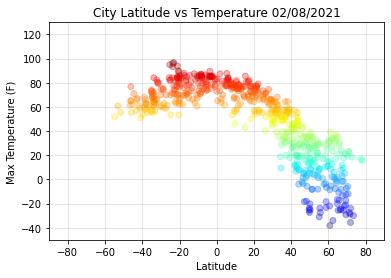

Add a sentence.


In [128]:
# To convert the access date: https://www.tutorialspoint.com/python/time_strftime.htm
# https://medium.com/better-programming/how-to-use-colormaps-with-matplotlib-to-create-colorful-plots-in-python-969b5a892f0c
# https://matplotlib.org/examples/color/colormaps_reference.html

plt.title(f'City Latitude vs Temperature {time.strftime("%m/%d/%Y")}')
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True, linestyle="-", which="major", color="gray", alpha = 0.25)
plt.xlim(-90,90)
plt.ylim(-50, 130)

plt.scatter(clean_city_data_df["Latitude"], clean_city_data_df["Max Temperature (F)"], alpha= 0.3, c = clean_city_data_df["Max Temperature (F)"], cmap = "jet", marker="o")
plt.show()

print(f"Add a sentence.")

##  Latitude vs. Humidity Plot

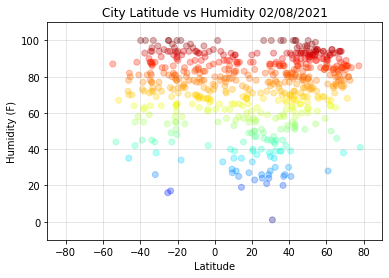

Add a sentence.


In [129]:
plt.title(f'City Latitude vs Humidity {time.strftime("%m/%d/%Y")}')
plt.ylabel("Humidity (F)")
plt.xlabel("Latitude")
plt.grid(True, linestyle="-", which="major", color="gray", alpha = 0.25)
plt.xlim(-90,90)
plt.ylim(-10, 110)

plt.scatter(clean_city_data_df["Latitude"], clean_city_data_df["Humidity (%)"], alpha= 0.3, c = clean_city_data_df["Humidity (%)"], cmap = "jet", marker="o")
plt.show()

print(f"Add a sentence.")

## Latitude vs. Cloudiness Plot

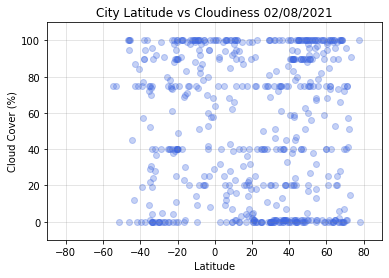

Add a sentence.


In [134]:
plt.title(f'City Latitude vs Cloudiness {time.strftime("%m/%d/%Y")}')
plt.ylabel("Cloud Cover (%)")
plt.xlabel("Latitude")
plt.grid(True, linestyle="-", which="major", color="gray", alpha = 0.25)
plt.xlim(-90,90)
plt.ylim(-10, 110)

plt.scatter(clean_city_data_df["Latitude"], clean_city_data_df["Cloud Cover (%)"], color = "royalblue", alpha= 0.3, marker="o")
plt.show()

print(f"Add a sentence.")

## Latitude vs. Wind Speed Plot

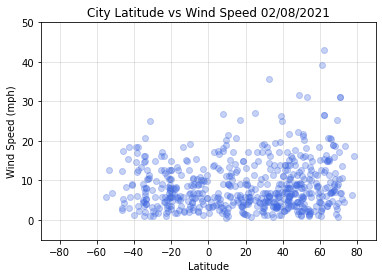

Add a sentence.


In [135]:
plt.title(f'City Latitude vs Wind Speed {time.strftime("%m/%d/%Y")}')
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True, linestyle="-", which="major", color="gray", alpha = 0.25)
plt.xlim(-90,90)
plt.ylim(-5, 50)

plt.scatter(clean_city_data_df["Latitude"], clean_city_data_df["Wind Speed (mph)"], color = "royalblue", alpha= 0.3, marker="o")
plt.show()

print(f"Add a sentence.")

## Linear Regression

In [36]:
# Find the cities in the northern hemisphere
north_cities = clean_city_data_df.loc[clean_city_data_df["Latitude"] > 0]
north_cities.head()

,City,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloud Cover (%),Wind Speed (mph),Date
1,Bethel,41.3712,-73.4140,28.40,64,90,13.80,1612756540
2,Severo-Kuril'sk,50.6789,156.1250,25.66,94,90,21.34,1612756534
3,Kifrī,34.6959,44.9661,52.03,76,0,3.42,1612756930
4,Magadan,59.5667,150.8000,14.77,85,75,18.52,1612756931
7,Winnemucca,40.9730,-117.7357,46.40,25,1,13.80,1612756839


In [37]:
# Find the cities in the southern hemisphere
south_cities = clean_city_data_df.loc[clean_city_data_df["Latitude"] <= 0]
south_cities.head()

,City,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloud Cover (%),Wind Speed (mph),Date
0,Ushuaia,-54.8000,-68.3000,51.80,87,75,5.75,1612756624
5,Lebu,-37.6167,-73.6500,58.30,93,95,3.56,1612756364
6,Kandrian,-6.2167,149.5500,86.63,68,78,10.36,1612756773
8,Hobart,-42.8794,147.3294,66.20,42,75,18.41,1612756359
9,Port Elizabeth,-33.9180,25.5701,64.40,77,0,16.11,1612756516


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

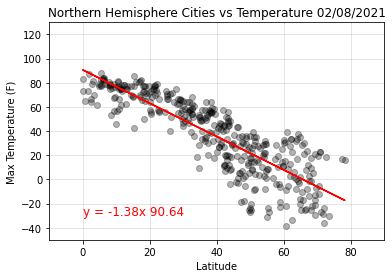

The r-squared value is 0.727628838696732.
Add a sentence.


In [137]:
# Set the x and y limits for each graph to include min and max latitude because it is unknow what cities will be
# determined in the random sampling.
x_values = north_cities["Latitude"]
y_values = north_cities["Max Temperature (F)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))

plt.title(f'Northern Hemisphere Cities vs Temperature {time.strftime("%m/%d/%Y")}')
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.xlim(-10,90)
plt.ylim(-50, 130)
plt.grid(True, linestyle="-", which="major", color="gray", alpha = 0.25)
plt.annotate(line_eq, (0,-30), fontsize = 12, color = "red")

plt.scatter(x_values, y_values, color="black", alpha=0.3, marker="o")
plt.plot(x_values, regress_values, "r-")
plt.show()

r = rvalue
r2 = r**2
print(f"The r-squared value is {r2}.")
print(f"Add a sentence.")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

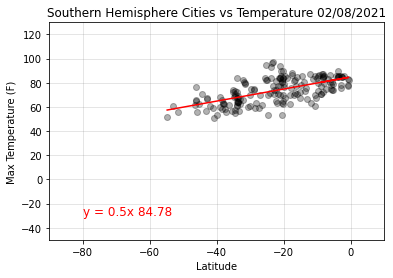

The r value is 0.6097756388760377.
The r-squared value is 0.37182632976667995.
Add a sentence.


In [138]:
x_values = south_cities["Latitude"]
y_values = south_cities["Max Temperature (F)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))

plt.title(f'Southern Hemisphere Cities vs Temperature {time.strftime("%m/%d/%Y")}')
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.xlim(-90,10)
plt.ylim(-50, 130)
plt.grid(True, linestyle="-", which="major", color="gray", alpha = 0.25)
plt.annotate(line_eq, (-80,-30), fontsize = 12, color = "red")

plt.scatter(x_values, y_values, color="black", alpha=0.3, marker="o")
plt.plot(x_values, regress_values, "r-")
plt.show()

r = rvalue
r2 = r**2
print(f"The r value is {r}.")
print(f"The r-squared value is {r2}.")
print(f"Add a sentence.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

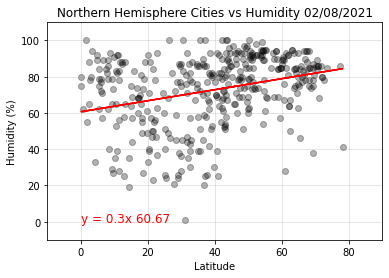

The r value is 0.30255777035672105.
The r-squared value is 0.09154120440323035.
Add a sentence.


In [139]:
x_values = north_cities["Latitude"]
y_values = north_cities["Humidity (%)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))

plt.title(f'Northern Hemisphere Cities vs Humidity {time.strftime("%m/%d/%Y")}')
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.xlim(-10,90)
plt.ylim(-10, 110)
plt.grid(True, linestyle="-", which="major", color="gray", alpha = 0.25)
plt.annotate(line_eq, (0,0), fontsize = 12, color = "red")

plt.scatter(x_values, y_values, color="black", alpha=0.3, marker="o")
plt.plot(x_values, regress_values, "r-")
plt.show()

r = rvalue
r2 = r**2
print(f"The r value is {r}.")
print(f"The r-squared value is {r2}.")
print(f"Add a sentence.")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

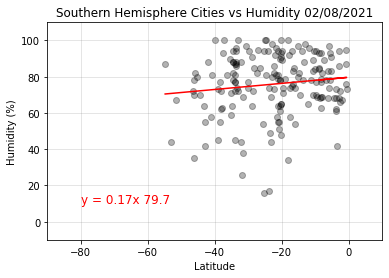

The r value is 0.13012611072371205.
The r-squared value is 0.016932804692079768.
Add a sentence.


In [140]:
x_values = south_cities["Latitude"]
y_values = south_cities["Humidity (%)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))

plt.title(f'Southern Hemisphere Cities vs Humidity {time.strftime("%m/%d/%Y")}')
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.xlim(-90,10)
plt.ylim(-10, 110)
plt.grid(True, linestyle="-", which="major", color="gray", alpha = 0.25)
plt.annotate(line_eq, (-80,10), fontsize = 12, color = "red")

plt.scatter(x_values, y_values, color="black", alpha=0.3, marker="o")
plt.plot(x_values, regress_values, "r-")
plt.show()

r = rvalue
r2 = r**2
print(f"The r value is {r}.")
print(f"The r-squared value is {r2}.")
print(f"Add a sentence.")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

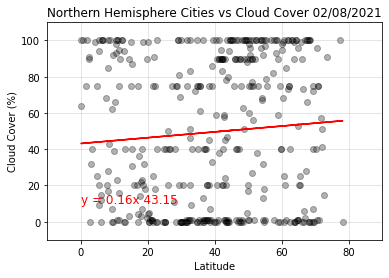

The r value is 0.07791290027534124.
The r-squared value is 0.00607042002931527.
Add a sentence.


In [141]:
x_values = north_cities["Latitude"]
y_values = north_cities["Cloud Cover (%)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))

plt.title(f'Northern Hemisphere Cities vs Cloud Cover {time.strftime("%m/%d/%Y")}')
plt.ylabel("Cloud Cover (%)")
plt.xlabel("Latitude")
plt.xlim(-10,90)
plt.ylim(-10, 110)
plt.grid(True, linestyle="-", which="major", color="gray", alpha = 0.25)
plt.annotate(line_eq, (0,10), fontsize = 12, color = "red")

plt.scatter(x_values, y_values, color="black", alpha=0.3, marker="o")
plt.plot(x_values, regress_values, "r-")
plt.show()

r = rvalue
r2 = r**2
print(f"The r value is {r}.")
print(f"The r-squared value is {r2}.")
print(f"Add a sentence.")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

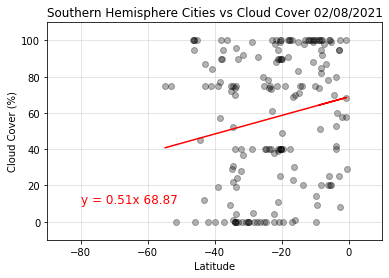

The r value is 0.17946855391767738.
The r-squared value is 0.032208961845302274.
Add a sentence.


In [142]:
x_values = south_cities["Latitude"]
y_values = south_cities["Cloud Cover (%)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))

plt.title(f'Southern Hemisphere Cities vs Cloud Cover {time.strftime("%m/%d/%Y")}')
plt.ylabel("Cloud Cover (%)")
plt.xlabel("Latitude")
plt.xlim(-90,10)
plt.ylim(-10, 110)
plt.grid(True, linestyle="-", which="major", color="gray", alpha = 0.25)
plt.annotate(line_eq, (-80,10), fontsize = 12, color = "red")

plt.scatter(x_values, y_values, color="black", alpha=0.3, marker="o")
plt.plot(x_values, regress_values, "r-")
plt.show()

r = rvalue
r2 = r**2
print(f"The r value is {r}.")
print(f"The r-squared value is {r2}.")
print(f"Add a sentence.")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

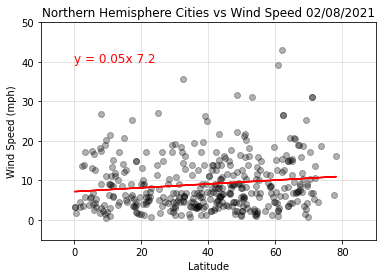

The r value is 0.13923236729775093.
The r-squared value is 0.019385652103335822.
Add a sentence.


In [143]:
x_values = north_cities["Latitude"]
y_values = north_cities["Wind Speed (mph)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))

plt.title(f'Northern Hemisphere Cities vs Wind Speed {time.strftime("%m/%d/%Y")}')
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.xlim(-10,90)
plt.ylim(-5, 50)
plt.grid(True, linestyle="-", which="major", color="gray", alpha = 0.25)
plt.annotate(line_eq, (0,40), fontsize = 12, color = "red")

plt.scatter(x_values, y_values, color="black", alpha=0.3, marker="o")
plt.plot(x_values, regress_values, "r-")
plt.show()

r = rvalue
r2 = r**2
print(f"The r value is {r}.")
print(f"The r-squared value is {r2}.")
print(f"Add a sentence.")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

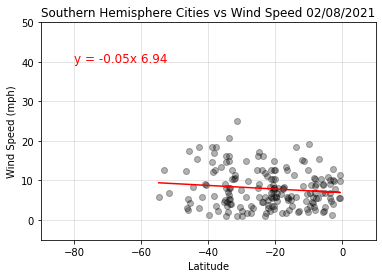

The r value is -0.12277102919872245.
The r-squared value is 0.015072725610513558.
Add a sentence.


In [144]:
x_values = south_cities["Latitude"]
y_values = south_cities["Wind Speed (mph)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))

plt.title(f'Southern Hemisphere Cities vs Wind Speed {time.strftime("%m/%d/%Y")}')
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.xlim(-90,10)
plt.ylim(-5, 50)
plt.grid(True, linestyle="-", which="major", color="gray", alpha = 0.25)
plt.annotate(line_eq, (-80,40), fontsize = 12, color = "red")

plt.scatter(x_values, y_values, color="black", alpha=0.3, marker="o")
plt.plot(x_values, regress_values, "r-")
plt.show()

r = rvalue
r2 = r**2
print(f"The r value is {r}.")
print(f"The r-squared value is {r2}.")
print(f"Add a sentence.")